## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   5.249826   471.260372  0.140252  5.474263  1.457179
1  64.447005   949.349881  0.131072  3.766388  1.077129
2  65.424546   698.572755  0.130656  3.913238  0.938392
3  23.577836  1587.361773  0.474049  1.823612  1.481324
4  35.749197   380.227316  0.245566  4.238409  1.271987


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.06946 | train_mse: 4.15311 | train_mae: 1.53433 |  0:00:00s
epoch 1  | loss: 0.73197 | train_mse: 2.72058 | train_mae: 1.31475 |  0:00:00s
epoch 2  | loss: 0.73407 | train_mse: 1.96057 | train_mae: 1.10213 |  0:00:00s


epoch 3  | loss: 0.57391 | train_mse: 1.77353 | train_mae: 1.06197 |  0:00:00s
epoch 4  | loss: 0.38613 | train_mse: 2.17895 | train_mae: 1.15152 |  0:00:00s
epoch 5  | loss: 0.51261 | train_mse: 2.14274 | train_mae: 1.11436 |  0:00:00s


epoch 6  | loss: 0.39161 | train_mse: 2.09113 | train_mae: 1.08654 |  0:00:00s
epoch 7  | loss: 0.39959 | train_mse: 2.27477 | train_mae: 1.0949  |  0:00:00s
epoch 8  | loss: 0.48159 | train_mse: 2.27122 | train_mae: 1.03581 |  0:00:00s


epoch 9  | loss: 0.52676 | train_mse: 1.29108 | train_mae: 0.82391 |  0:00:01s
epoch 10 | loss: 0.35704 | train_mse: 0.74654 | train_mae: 0.6185  |  0:00:01s
epoch 11 | loss: 0.40856 | train_mse: 0.65696 | train_mae: 0.58394 |  0:00:01s


epoch 12 | loss: 0.32172 | train_mse: 0.5964  | train_mae: 0.55089 |  0:00:01s
epoch 13 | loss: 0.41988 | train_mse: 0.61395 | train_mae: 0.56815 |  0:00:01s
epoch 14 | loss: 0.44689 | train_mse: 0.67391 | train_mae: 0.60163 |  0:00:01s


epoch 15 | loss: 0.38831 | train_mse: 0.55485 | train_mae: 0.54841 |  0:00:01s
epoch 16 | loss: 0.31775 | train_mse: 0.48943 | train_mae: 0.5209  |  0:00:01s


epoch 17 | loss: 0.37834 | train_mse: 0.42712 | train_mae: 0.49134 |  0:00:01s
epoch 18 | loss: 0.37398 | train_mse: 0.41008 | train_mae: 0.48591 |  0:00:01s


epoch 19 | loss: 0.33346 | train_mse: 0.39099 | train_mae: 0.46942 |  0:00:02s
epoch 20 | loss: 0.31538 | train_mse: 0.49297 | train_mae: 0.51313 |  0:00:02s
epoch 21 | loss: 0.32024 | train_mse: 0.50169 | train_mae: 0.51181 |  0:00:02s


epoch 22 | loss: 0.31201 | train_mse: 0.49474 | train_mae: 0.50397 |  0:00:02s
epoch 23 | loss: 0.35084 | train_mse: 0.42849 | train_mae: 0.46213 |  0:00:02s
epoch 24 | loss: 0.34516 | train_mse: 0.27    | train_mae: 0.35986 |  0:00:02s


epoch 25 | loss: 0.25635 | train_mse: 0.25168 | train_mae: 0.3685  |  0:00:02s
epoch 26 | loss: 0.29565 | train_mse: 0.25866 | train_mae: 0.37223 |  0:00:02s


epoch 27 | loss: 0.2495  | train_mse: 0.28335 | train_mae: 0.3951  |  0:00:02s
epoch 28 | loss: 0.26787 | train_mse: 0.30974 | train_mae: 0.41345 |  0:00:03s


epoch 29 | loss: 0.32401 | train_mse: 0.34149 | train_mae: 0.43695 |  0:00:03s
epoch 30 | loss: 0.28175 | train_mse: 0.28467 | train_mae: 0.37943 |  0:00:03s


epoch 31 | loss: 0.21009 | train_mse: 0.23344 | train_mae: 0.33011 |  0:00:03s
epoch 32 | loss: 0.23294 | train_mse: 0.24583 | train_mae: 0.35059 |  0:00:03s


epoch 33 | loss: 0.41499 | train_mse: 0.30925 | train_mae: 0.39166 |  0:00:03s
epoch 34 | loss: 0.24264 | train_mse: 0.26417 | train_mae: 0.37192 |  0:00:03s


epoch 35 | loss: 0.28964 | train_mse: 0.21278 | train_mae: 0.33281 |  0:00:03s
epoch 36 | loss: 0.25699 | train_mse: 0.20371 | train_mae: 0.31768 |  0:00:04s
epoch 37 | loss: 0.22532 | train_mse: 0.19155 | train_mae: 0.30063 |  0:00:04s


epoch 38 | loss: 0.38478 | train_mse: 0.21557 | train_mae: 0.32    |  0:00:04s
epoch 39 | loss: 0.31034 | train_mse: 0.20999 | train_mae: 0.319   |  0:00:04s
epoch 40 | loss: 0.31465 | train_mse: 0.25854 | train_mae: 0.35563 |  0:00:04s


epoch 41 | loss: 0.22174 | train_mse: 0.28155 | train_mae: 0.37191 |  0:00:04s
epoch 42 | loss: 0.41339 | train_mse: 0.33459 | train_mae: 0.40741 |  0:00:04s
epoch 43 | loss: 0.45312 | train_mse: 0.39237 | train_mae: 0.43839 |  0:00:04s


epoch 44 | loss: 0.35846 | train_mse: 0.31195 | train_mae: 0.38992 |  0:00:04s
epoch 45 | loss: 0.24261 | train_mse: 0.22759 | train_mae: 0.34993 |  0:00:04s
epoch 46 | loss: 0.36975 | train_mse: 0.1633  | train_mae: 0.30507 |  0:00:04s


epoch 47 | loss: 0.14779 | train_mse: 0.16173 | train_mae: 0.29814 |  0:00:05s
epoch 48 | loss: 0.28414 | train_mse: 0.17678 | train_mae: 0.31972 |  0:00:05s
epoch 49 | loss: 0.1865  | train_mse: 0.16707 | train_mae: 0.31865 |  0:00:05s


epoch 50 | loss: 0.25365 | train_mse: 0.16771 | train_mae: 0.32177 |  0:00:05s
epoch 51 | loss: 0.1506  | train_mse: 0.16593 | train_mae: 0.32107 |  0:00:05s
epoch 52 | loss: 0.36123 | train_mse: 0.15895 | train_mae: 0.31733 |  0:00:05s


epoch 53 | loss: 0.17518 | train_mse: 0.1465  | train_mae: 0.30176 |  0:00:05s
epoch 54 | loss: 0.2268  | train_mse: 0.13304 | train_mae: 0.27844 |  0:00:05s


epoch 55 | loss: 0.1888  | train_mse: 0.13611 | train_mae: 0.27675 |  0:00:05s
epoch 56 | loss: 0.16822 | train_mse: 0.12075 | train_mae: 0.26084 |  0:00:05s
epoch 57 | loss: 0.28096 | train_mse: 0.11994 | train_mae: 0.26063 |  0:00:05s


epoch 58 | loss: 0.27375 | train_mse: 0.10661 | train_mae: 0.24429 |  0:00:06s
epoch 59 | loss: 0.16232 | train_mse: 0.13707 | train_mae: 0.28368 |  0:00:06s
epoch 60 | loss: 0.19172 | train_mse: 0.13921 | train_mae: 0.2943  |  0:00:06s


epoch 61 | loss: 0.19042 | train_mse: 0.13782 | train_mae: 0.29077 |  0:00:06s
epoch 62 | loss: 0.1214  | train_mse: 0.11647 | train_mae: 0.25975 |  0:00:06s


epoch 63 | loss: 0.15423 | train_mse: 0.12244 | train_mae: 0.26703 |  0:00:06s
epoch 64 | loss: 0.13784 | train_mse: 0.10296 | train_mae: 0.24312 |  0:00:06s


epoch 65 | loss: 0.139   | train_mse: 0.0916  | train_mae: 0.2322  |  0:00:06s


epoch 66 | loss: 0.17381 | train_mse: 0.08295 | train_mae: 0.22443 |  0:00:07s
epoch 67 | loss: 0.16455 | train_mse: 0.0903  | train_mae: 0.2248  |  0:00:07s


epoch 68 | loss: 0.15851 | train_mse: 0.0869  | train_mae: 0.22156 |  0:00:07s
epoch 69 | loss: 0.14522 | train_mse: 0.10082 | train_mae: 0.23507 |  0:00:07s


epoch 70 | loss: 0.21541 | train_mse: 0.10016 | train_mae: 0.23269 |  0:00:07s


epoch 71 | loss: 0.13043 | train_mse: 0.09467 | train_mae: 0.22605 |  0:00:07s


epoch 72 | loss: 0.2519  | train_mse: 0.10794 | train_mae: 0.24368 |  0:00:08s
epoch 73 | loss: 0.16364 | train_mse: 0.09111 | train_mae: 0.23171 |  0:00:08s


epoch 74 | loss: 0.11046 | train_mse: 0.09244 | train_mae: 0.23656 |  0:00:08s
epoch 75 | loss: 0.12442 | train_mse: 0.10982 | train_mae: 0.25392 |  0:00:08s


epoch 76 | loss: 0.1068  | train_mse: 0.08614 | train_mae: 0.22759 |  0:00:08s


epoch 77 | loss: 0.27057 | train_mse: 0.08569 | train_mae: 0.22922 |  0:00:08s
epoch 78 | loss: 0.12557 | train_mse: 0.08178 | train_mae: 0.22474 |  0:00:09s


epoch 79 | loss: 0.15671 | train_mse: 0.07872 | train_mae: 0.2228  |  0:00:09s
epoch 80 | loss: 0.15293 | train_mse: 0.07957 | train_mae: 0.2233  |  0:00:09s


epoch 81 | loss: 0.38766 | train_mse: 0.0878  | train_mae: 0.22777 |  0:00:09s
epoch 82 | loss: 0.0874  | train_mse: 0.09689 | train_mae: 0.24333 |  0:00:09s


epoch 83 | loss: 0.1054  | train_mse: 0.09562 | train_mae: 0.23994 |  0:00:09s
epoch 84 | loss: 0.17725 | train_mse: 0.096   | train_mae: 0.2402  |  0:00:09s


epoch 85 | loss: 0.14059 | train_mse: 0.0861  | train_mae: 0.22933 |  0:00:09s
epoch 86 | loss: 0.14116 | train_mse: 0.08616 | train_mae: 0.23101 |  0:00:09s
epoch 87 | loss: 0.14296 | train_mse: 0.10208 | train_mae: 0.24134 |  0:00:10s


epoch 88 | loss: 0.16464 | train_mse: 0.09798 | train_mae: 0.23381 |  0:00:10s
epoch 89 | loss: 0.14128 | train_mse: 0.08489 | train_mae: 0.22219 |  0:00:10s


epoch 90 | loss: 0.18581 | train_mse: 0.10026 | train_mae: 0.25315 |  0:00:10s
epoch 91 | loss: 0.16437 | train_mse: 0.11307 | train_mae: 0.26816 |  0:00:10s


epoch 92 | loss: 0.16033 | train_mse: 0.08615 | train_mae: 0.2299  |  0:00:10s


epoch 93 | loss: 0.10124 | train_mse: 0.09131 | train_mae: 0.23547 |  0:00:11s
epoch 94 | loss: 0.16588 | train_mse: 0.10374 | train_mae: 0.24151 |  0:00:11s


epoch 95 | loss: 0.14745 | train_mse: 0.08433 | train_mae: 0.22276 |  0:00:11s
epoch 96 | loss: 0.12819 | train_mse: 0.07225 | train_mae: 0.21131 |  0:00:11s


epoch 97 | loss: 0.21378 | train_mse: 0.07877 | train_mae: 0.2285  |  0:00:11s


epoch 98 | loss: 0.10926 | train_mse: 0.08275 | train_mae: 0.23097 |  0:00:12s


epoch 99 | loss: 0.11417 | train_mse: 0.07589 | train_mae: 0.21033 |  0:00:12s
epoch 100| loss: 0.1918  | train_mse: 0.09652 | train_mae: 0.24055 |  0:00:12s


epoch 101| loss: 0.15584 | train_mse: 0.09085 | train_mae: 0.22583 |  0:00:12s


epoch 102| loss: 0.30522 | train_mse: 0.08746 | train_mae: 0.22591 |  0:00:12s


epoch 103| loss: 0.14375 | train_mse: 0.09773 | train_mae: 0.22877 |  0:00:13s
epoch 104| loss: 0.29654 | train_mse: 0.10755 | train_mae: 0.24209 |  0:00:13s


epoch 105| loss: 0.14533 | train_mse: 0.10532 | train_mae: 0.24114 |  0:00:13s
epoch 106| loss: 0.17801 | train_mse: 0.11567 | train_mae: 0.2585  |  0:00:13s


epoch 107| loss: 0.11103 | train_mse: 0.10933 | train_mae: 0.25482 |  0:00:13s


epoch 108| loss: 0.16886 | train_mse: 0.11442 | train_mae: 0.26515 |  0:00:14s
epoch 109| loss: 0.14433 | train_mse: 0.13157 | train_mae: 0.28053 |  0:00:14s


epoch 110| loss: 0.45357 | train_mse: 0.21512 | train_mae: 0.36397 |  0:00:14s
epoch 111| loss: 0.23749 | train_mse: 0.25235 | train_mae: 0.38051 |  0:00:14s


epoch 112| loss: 0.36547 | train_mse: 0.23968 | train_mae: 0.36934 |  0:00:15s


epoch 113| loss: 0.20634 | train_mse: 0.23307 | train_mae: 0.36521 |  0:00:15s


epoch 114| loss: 0.31097 | train_mse: 0.20125 | train_mae: 0.33854 |  0:00:15s


epoch 115| loss: 0.17571 | train_mse: 0.14671 | train_mae: 0.30341 |  0:00:16s


epoch 116| loss: 0.22918 | train_mse: 0.13837 | train_mae: 0.29551 |  0:00:16s


epoch 117| loss: 0.17444 | train_mse: 0.1109  | train_mae: 0.26824 |  0:00:16s


epoch 118| loss: 0.14255 | train_mse: 0.09239 | train_mae: 0.25037 |  0:00:16s
epoch 119| loss: 0.12321 | train_mse: 0.0894  | train_mae: 0.23961 |  0:00:17s


epoch 120| loss: 0.11584 | train_mse: 0.1034  | train_mae: 0.2496  |  0:00:17s
epoch 121| loss: 0.10995 | train_mse: 0.10769 | train_mae: 0.25043 |  0:00:17s


epoch 122| loss: 0.13041 | train_mse: 0.11873 | train_mae: 0.26481 |  0:00:17s


epoch 123| loss: 0.20485 | train_mse: 0.17437 | train_mae: 0.30301 |  0:00:17s


epoch 124| loss: 0.16477 | train_mse: 0.1705  | train_mae: 0.29554 |  0:00:18s


epoch 125| loss: 0.09984 | train_mse: 0.16647 | train_mae: 0.28804 |  0:00:18s


epoch 126| loss: 0.19533 | train_mse: 0.14557 | train_mae: 0.25933 |  0:00:18s


epoch 127| loss: 0.13992 | train_mse: 0.1345  | train_mae: 0.25001 |  0:00:19s
epoch 128| loss: 0.12119 | train_mse: 0.1424  | train_mae: 0.26566 |  0:00:19s


epoch 129| loss: 0.22007 | train_mse: 0.1461  | train_mae: 0.27974 |  0:00:19s
epoch 130| loss: 0.19156 | train_mse: 0.15395 | train_mae: 0.27549 |  0:00:19s
epoch 131| loss: 0.16441 | train_mse: 0.12529 | train_mae: 0.24278 |  0:00:19s


epoch 132| loss: 0.12086 | train_mse: 0.12525 | train_mae: 0.25104 |  0:00:19s
epoch 133| loss: 0.12861 | train_mse: 0.15062 | train_mae: 0.27451 |  0:00:19s
epoch 134| loss: 0.13907 | train_mse: 0.12075 | train_mae: 0.25815 |  0:00:19s


epoch 135| loss: 0.24862 | train_mse: 0.12466 | train_mae: 0.25408 |  0:00:20s
epoch 136| loss: 0.11395 | train_mse: 0.12734 | train_mae: 0.27213 |  0:00:20s
epoch 137| loss: 0.19899 | train_mse: 0.10773 | train_mae: 0.25207 |  0:00:20s


epoch 138| loss: 0.15918 | train_mse: 0.11233 | train_mae: 0.2649  |  0:00:20s
epoch 139| loss: 0.20252 | train_mse: 0.12042 | train_mae: 0.27262 |  0:00:20s
epoch 140| loss: 0.15006 | train_mse: 0.12666 | train_mae: 0.28971 |  0:00:20s


epoch 141| loss: 0.19212 | train_mse: 0.14883 | train_mae: 0.31057 |  0:00:20s


epoch 142| loss: 0.16758 | train_mse: 0.13394 | train_mae: 0.28998 |  0:00:21s


epoch 143| loss: 0.17246 | train_mse: 0.11374 | train_mae: 0.27092 |  0:00:21s
epoch 144| loss: 0.19817 | train_mse: 0.11814 | train_mae: 0.27106 |  0:00:21s


epoch 145| loss: 0.16433 | train_mse: 0.11568 | train_mae: 0.27532 |  0:00:21s
epoch 146| loss: 0.16555 | train_mse: 0.14207 | train_mae: 0.29578 |  0:00:21s


epoch 147| loss: 0.14758 | train_mse: 0.16406 | train_mae: 0.30966 |  0:00:21s
epoch 148| loss: 0.13467 | train_mse: 0.14663 | train_mae: 0.30061 |  0:00:22s


epoch 149| loss: 0.14436 | train_mse: 0.12874 | train_mae: 0.26958 |  0:00:22s

Early stopping occurred at epoch 149 with best_epoch = 99 and best_train_mae = 0.21033
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

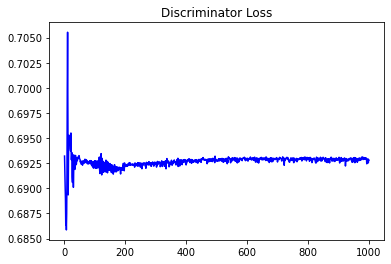

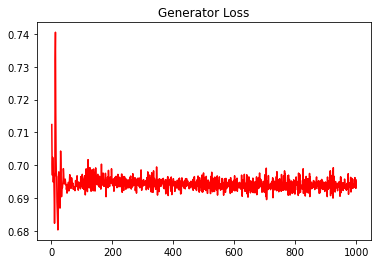

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15732184963898652


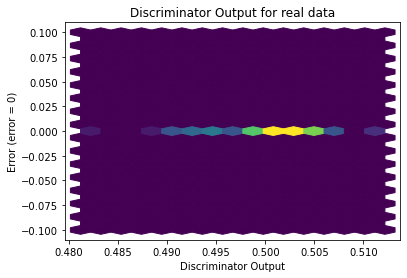

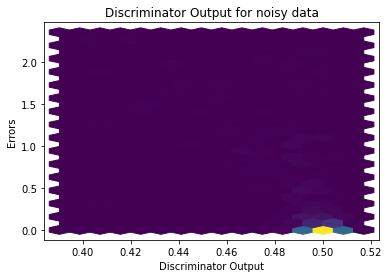

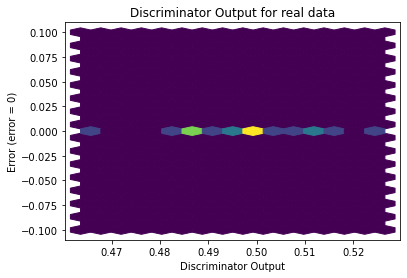

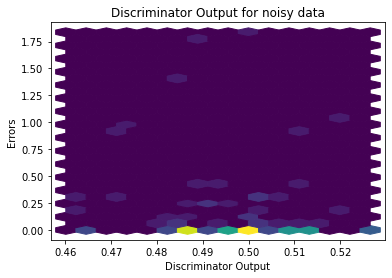

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


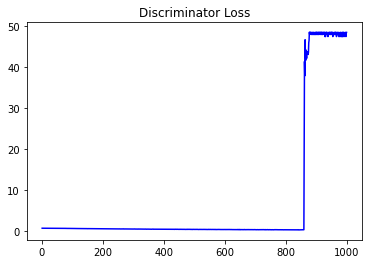

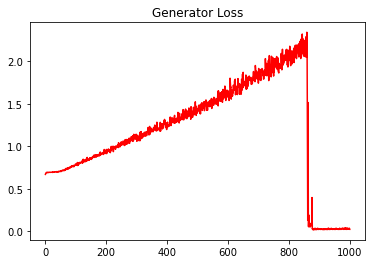

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
55.59237138558143


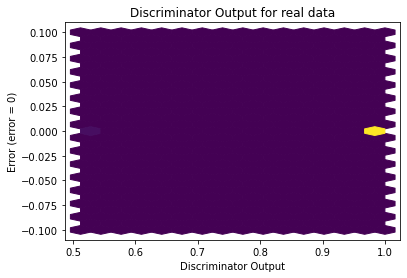

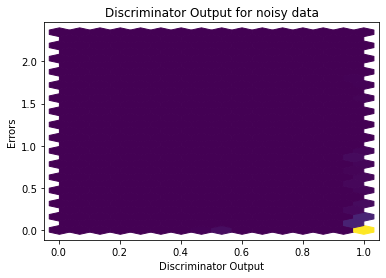

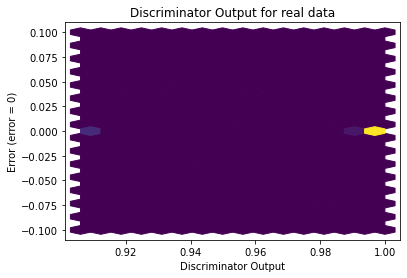

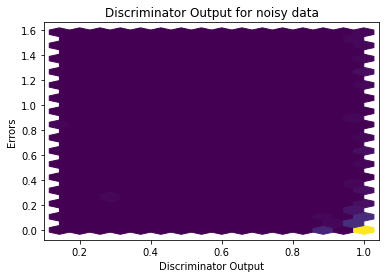

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0488]], requires_grad=True)
